In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as L
import pandas as pd
import cv2

%matplotlib inline

Using TensorFlow backend.


In [3]:
data = pd.read_csv('data/train_gt.csv')
data.head()

,filename,classnum
0,0000.avi,56
1,0001.avi,51
2,0002.avi,64
3,0003.avi,23
4,0004.avi,41


In [4]:
name_to_class = {}
for row in data.iterrows():
    name_to_class[row[1]['filename']] = row[1]['classnum']

In [5]:
from tqdm import tqdm, tqdm_notebook

In [6]:
vidcap = cv2.VideoCapture('data/action-recognition-train/2345.avi')


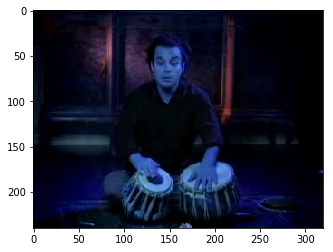

In [7]:
succ, image = vidcap.read()
plt.imshow(image)
succ, image2 = vidcap.read()

In [8]:
image.max(), image.dtype, image.shape

(250, dtype('uint8'), (240, 320, 3))

In [9]:
prvs = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
prvs.max(), prvs.min(), prvs.dtype

(186, 0, dtype('uint8'))

In [10]:
hsv = np.zeros_like(image)
hsv[...,1] = 255

In [11]:
next = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
next.shape, next.dtype

((240, 320), dtype('uint8'))

In [12]:
flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow.shape, flow.dtype

((240, 320, 2), dtype('float32'))

In [13]:
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang * 180 / np.pi / 2
hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

In [14]:
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

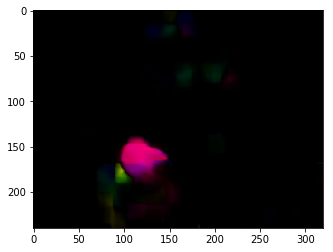

In [19]:
plt.imshow(bgr, cmap='brg')

In [30]:
bgr[...,2].max()

153

In [31]:
from skimage.transform import resize
from skimage.io import imsave
import os

In [38]:
PATH = 'data/action-recognition-train/'
CONV_PATH = 'data/train_converted/imgs/'
FLOW_PATH = 'data/train_converted/flow/'
with open('log.txt', 'w') as log:
    for vid_name in tqdm_notebook(os.listdir('data/action-recognition-train/')):
        log.write('Processing video {}'.format(vid_name))
        prev_frame = None
        idx = vid_name.split('.')[0]
        vidcap = cv2.VideoCapture(PATH + vid_name)
        succ, image = vidcap.read()
        image = cv2.resize(image, dsize=(320, 240))
        prev_frame = image
        ind = 0
        os.mkdir(CONV_PATH + idx)
        os.mkdir(FLOW_PATH + idx)
        cv2.imwrite(CONV_PATH + idx + '/' + str(ind) + '.jpg', image)
        while succ:
            succ, image = vidcap.read()
            if not succ:
                break
            ind += 1
            image = cv2.resize(image, dsize=(320, 240))
            cv2.imwrite(CONV_PATH + idx + '/' + str(ind) + '.jpg', image)
            prvs = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
            hsv = np.zeros_like(image)
            hsv[...,1] = 255
            nxt = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prvs, nxt, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang * 180 / np.pi / 2
            hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
            cv2.imwrite(FLOW_PATH + idx + '/' + str(ind) + '.jpg', image)
        log.write('Video {} processed'.format(vid_name))

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
with open('log_2.txt', 'w') as log:
    for idx in tqdm_notebook(os.listdir(CONV_PATH)):
        log.write('Processing {} folder\n'.format(idx))
        prev_frame = cv2.imread(CONV_PATH + idx + '/0.jpg')
        for i in range(1, len(os.listdir(CONV_PATH + idx))):
            image = cv2.imread(CONV_PATH + idx + '/{}.jpg'.format(i))
            prvs = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
            hsv = np.zeros_like(image)
            hsv[...,1] = 255
            nxt = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prvs, nxt, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang * 180 / np.pi / 2
            hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
            cv2.imwrite(FLOW_PATH + idx + '/{}.jpg'.format(i), bgr)
            prev_frame = image

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

